# Tutorial 2. Make Probability Distribution Function (PDF)

In [14]:
import numpy as NP
import matplotlib.pyplot as PLT

## 1. Standard  input or numpy.array for callable function
Take the following linear function being the example :
$$
 y = ax + b
$$

where $a = 2$ and $b = 1$. Please list the $y$ as function of $x$ with range from -2 ~ 50 with 2 as step

In [11]:
def y(x, a=2, b=1):
    return a*x + b

In [16]:
xstep = 2
xmin = -2
xmax = 50

### 1.1. standard input 

In [19]:
xs = []
ys = []
for i in range(int((xmax-xmin)/xstep)+1):
    x = xstep*i+xmin
    xs.append(x)
    ys.append(y(x))
print(xs)
print(ys)

[-2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
[-3, 1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101]


### 1.2. numpy solution

In [20]:
xs = NP.arange(xmin, xmax+xstep, xstep)
ys = y(xs)
print(xs)
print(ys)

[-2  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44
 46 48 50]
[ -3   1   5   9  13  17  21  25  29  33  37  41  45  49  53  57  61  65
  69  73  77  81  85  89  93  97 101]


### 1.3 Plot x & y

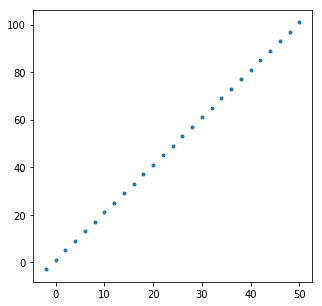

In [24]:
PLT.figure(figsize=[5,5])
PLT.plot(xs, ys, '.')

In [ ]:
# HW1. Modify a & b, then plot

## 2. Common PDF 